# Patient Data Extraction


### Extracting the CHB-MIT Scalp EEG Database & Analyzing data of 2 patients

Installing all the requirements:

In [ ]:
! pip install pyedflib mne matplotlib numpy pandas


### Reading the EDF File

Extracting EDF parameters from c:\Users\prani\OneDrive\Desktop\IEEE EMBS Internship\notebooks\data\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\prani\AppData\Local\Temp\ipykernel_13608\1016257616.py:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('data/chb01_03.edf', preload=True)


Using matplotlib as 2D backend.


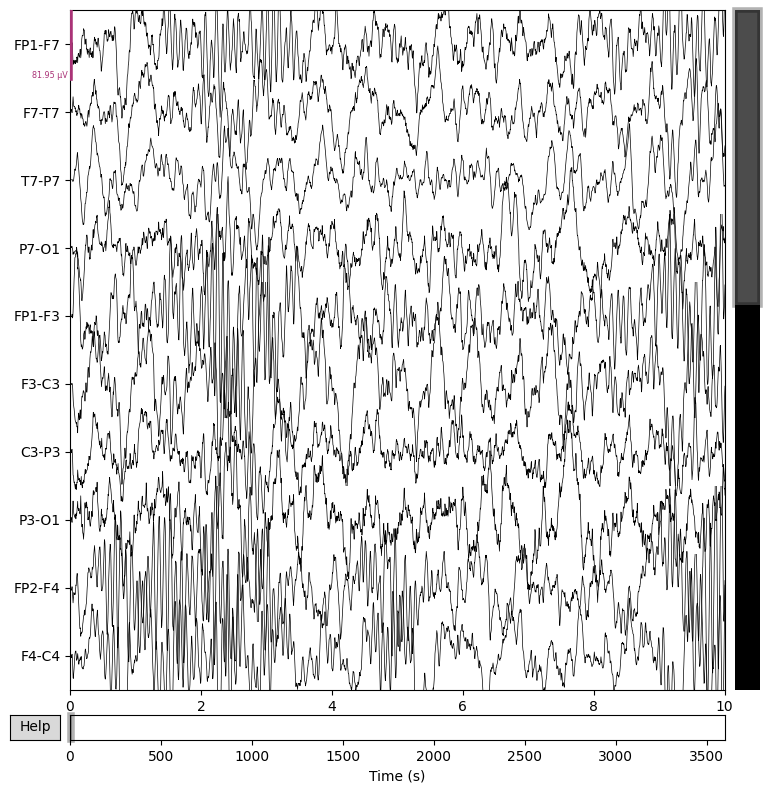

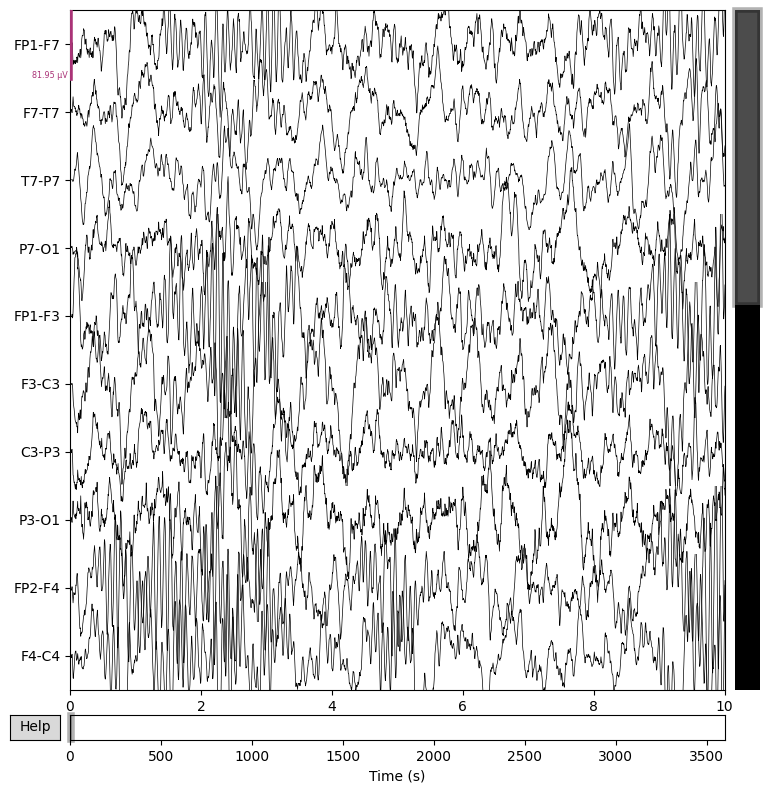

In [6]:
import mne

# Load the EDF file
raw = mne.io.read_raw_edf('data/chb01_03.edf', preload=True)

# Check basic info
raw.info

# Plot EEG signals
raw.plot(n_channels=10, scalings='auto', title='EEG Raw Data', show=True)


### Visualizing Time Specific Window

Extracting EDF parameters from c:\Users\prani\OneDrive\Desktop\IEEE EMBS Internship\notebooks\data\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\prani\AppData\Local\Temp\ipykernel_15936\3290061064.py:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf("data/chb01_03.edf", preload=True)


Using matplotlib as 2D backend.


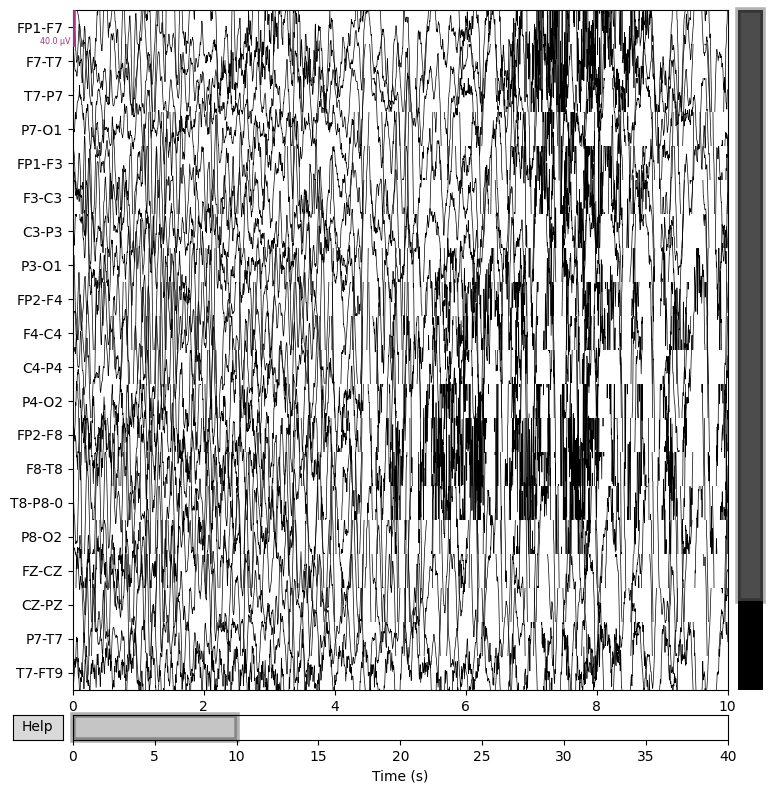

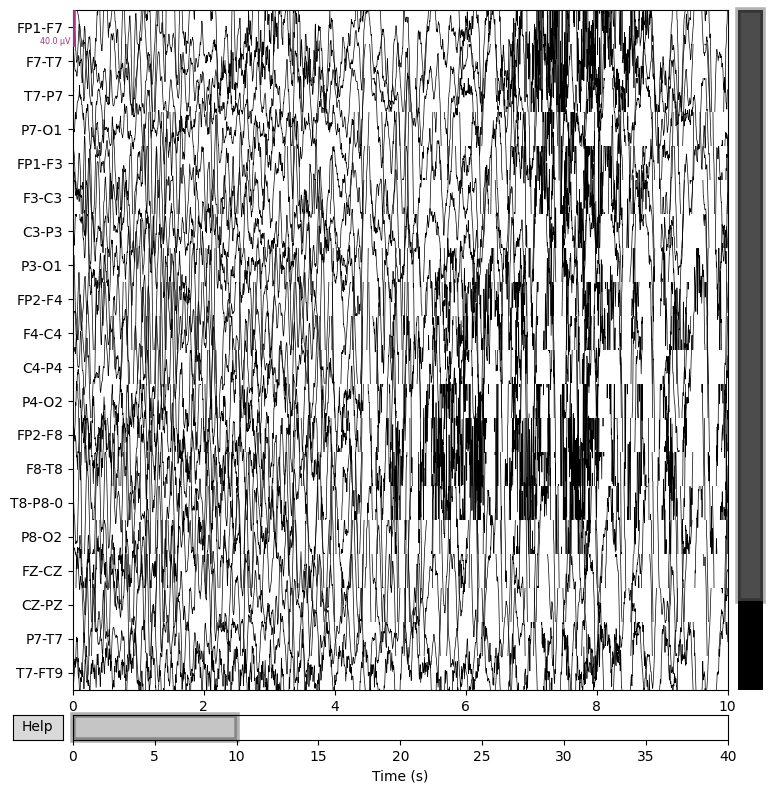

In [2]:
import mne

# Load the EEG data
raw = mne.io.read_raw_edf("data/chb01_03.edf", preload=True)

# Seizure occurs from 2996s to 3036s in the recording
seizure_start = 2996
seizure_end = 3036

# Crop EEG to seizure segment
seizure_segment = raw.copy().crop(tmin=seizure_start, tmax=seizure_end)

# Plot seizure segment
seizure_segment.plot(title='Seizure EEG Segment', show=True)


### Saving it as a CSV File

In [11]:
import pandas as pd

# Convert EEG data to NumPy array
data, times = seizure_segment[:]

# Convert to DataFrame
df = pd.DataFrame(data.T, columns=raw.ch_names)

# Save to CSV
df.to_csv('seizure_segment_chb01_03.csv', index=False)


PermissionError: [Errno 13] Permission denied: 'seizure_segment_chb01_03.csv'

Now that we have generated a CSV file where each column represents a specific EEG channel or electrode connection, here is the description of columns present:
| Channel Name | Meaning                                              |
| ------------ | ---------------------------------------------------- |
| **FP1-F7**   | Frontopolar left ↔ Frontal left                      |
| **F7-T7**    | Frontal left ↔ Temporal left                         |
| **T7-P7**    | Temporal left ↔ Parietal left                        |
| **P7-O1**    | Parietal left ↔ Occipital left                       |
| **FP1-F3**   | Frontopolar left ↔ Frontal mid-left                  |
| **F3-C3**    | Frontal mid-left ↔ Central mid-left                  |
| **C3-P3**    | Central mid-left ↔ Parietal mid-left                 |
| **P3-O1**    | Parietal mid-left ↔ Occipital left                   |
| **FP2-F4**   | Frontopolar right ↔ Frontal mid-right                |
| **F4-C4**    | Frontal mid-right ↔ Central mid-right                |
| **C4-P4**    | Central mid-right ↔ Parietal mid-right               |
| **P4-O2**    | Parietal mid-right ↔ Occipital right                 |
| **FP2-F8**   | Frontopolar right ↔ Frontal right                    |
| **F8-T8**    | Frontal right ↔ Temporal right                       |
| **T8-P8**    | Temporal right ↔ Parietal right                      |
| **P8-O2**    | Parietal right ↔ Occipital right                     |
| **FZ-CZ**    | Frontal midline ↔ Central midline                    |
| **CZ-PZ**    | Central midline ↔ Parietal midline                   |
| **T9-P7**    | Temporal far-left ↔ Parietal left                    |
| **P7-O1**    | Parietal left ↔ Occipital left                       |
| **T10-P8**   | Temporal far-right ↔ Parietal right                  |
| **P8-O2**    | Parietal right ↔ Occipital right                     |
| **FT9-FT10** | Far Temporal Left ↔ Far Temporal Right (cross-brain) |


**There are in total 23 channels, we will plot all channels in accordance with the part of brain they represent & analyze them .**

We are going to plot 4 graphs based on which regions of the brain these channels represent.
Brain Size Channels

| Brain Regions      | Channels                                           |
| -----------------  | ---------------------------------------------------|
| **Frontal**        | FP1-F7, FP2-F8, F3-C3, F4-C4                       |
| **Temporal**       | F7-T7, F8-T8, T7-P7, T8-P8-0                         |
| **Parietal**       | P3-O1, P4-O2, CZ-PZ, P7-O1                         |
| **Midline & Deep** | FZ-CZ, CZ-PZ, FT9-FT10                             |


![brain structure.png](<attachment:brain structure.png>)
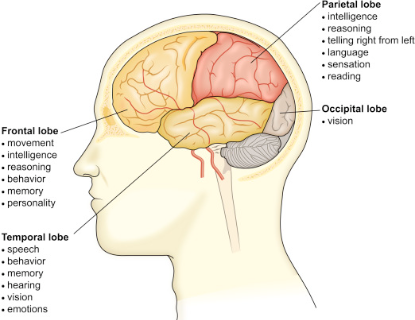

### The Frontal Lobe is responsible for:
* Executive functions (planning, decision-making, problem-solving)
* Motor control (movement, coordination)
* Any seizure detected in Frontal Lobe will directly impact these functions either for short term (1-2 seconds) or for longer durations.

### The Temporal Lobe is responsible for:
* Auditory processing (hearing, sound recognition)
* Memory (short-term and long-term)
* Any seizure detected in Temporal Lobe will impact the Memory or hearing/speech recognition.

### The Parietal lobe is responsible for:
* Sensory processing (touch, spatial awareness)
* Processing of sensory information
* Any seizure detected in Parietal lobe will impact the sensory processing.

### The Occipital lobe is responsible for:
* Visual processing (vision, visual perception)
* Any seizure detected in Occipital lobe will impact the vision.

**Frontal Region Visualization**

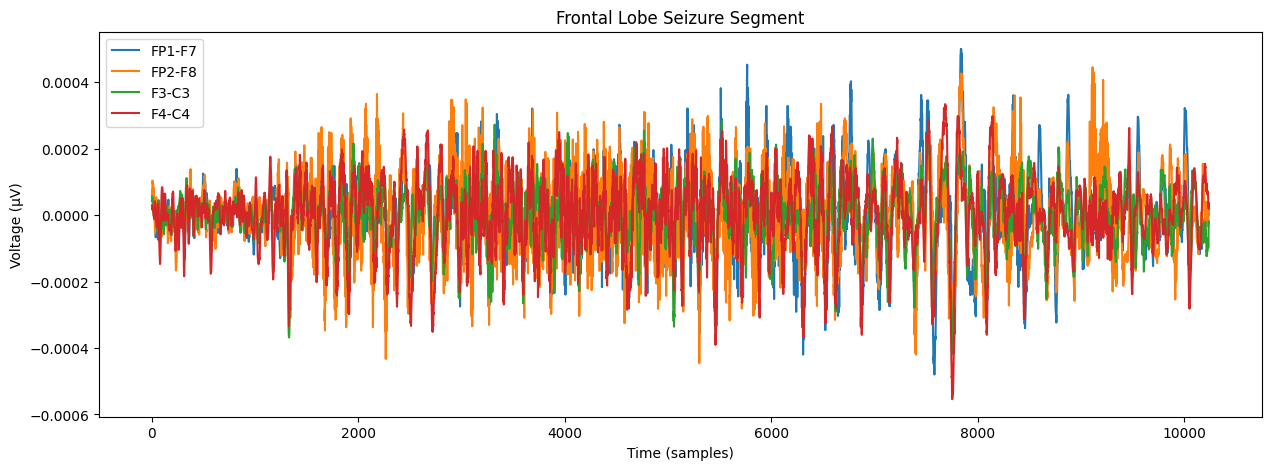

In [ ]:
import matplotlib.pyplot as plt

df[['FP1-F7', 'FP2-F8', 'F3-C3', 'F4-C4']].plot(figsize=(15, 5), title='Frontal Lobe Seizure Segment')
plt.xlabel("Time (samples)")
plt.ylabel("Voltage (µV)")
plt.show()


**Based on the visualizations we can derive the following insights for Frontal Lobe**
* Noticeable spike in signal amplitude between samples ~6000–8000. This indicates intense neural firing in this region.
* FP2-F8 and F4-C4 channels show the strongest activity, hinting at disruption in executive and motor control functions.
* Hence,it likely correlates with brief motor or behavioral arrest, common in frontal lobe seizures, even without visible convulsions.


**Temporal Region Visualization**

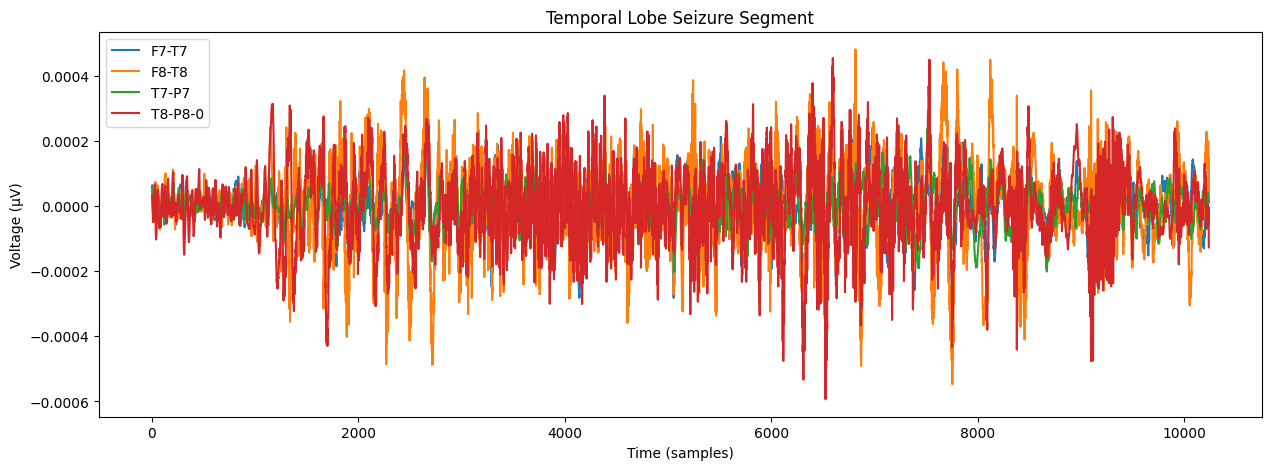

In [ ]:
import matplotlib.pyplot as plt

df[['F7-T7', 'F8-T8', 'T7-P7', 'T8-P8-0']].plot(figsize=(15, 5), title='Temporal Lobe Seizure Segment')
plt.xlabel("Time (samples)")
plt.ylabel("Voltage (µV)")
plt.show()

**Based on the visualizations we can derive the following insights for Temporal Lobe**
* F8-T8 and T8-P8-0 channels exhibit large-amplitude fluctuations and rapid frequency bursts which are signature traits of epileptic activity.
* Temporal lobes are a frequent origin site for focal epilepsy, and this graph supports that clinical correlation.
* The chaotic signal patterns may reflect symptoms like impaired awareness, auditory hallucinations, or emotional shifts during seizures.


**Parietal Region Visualization**

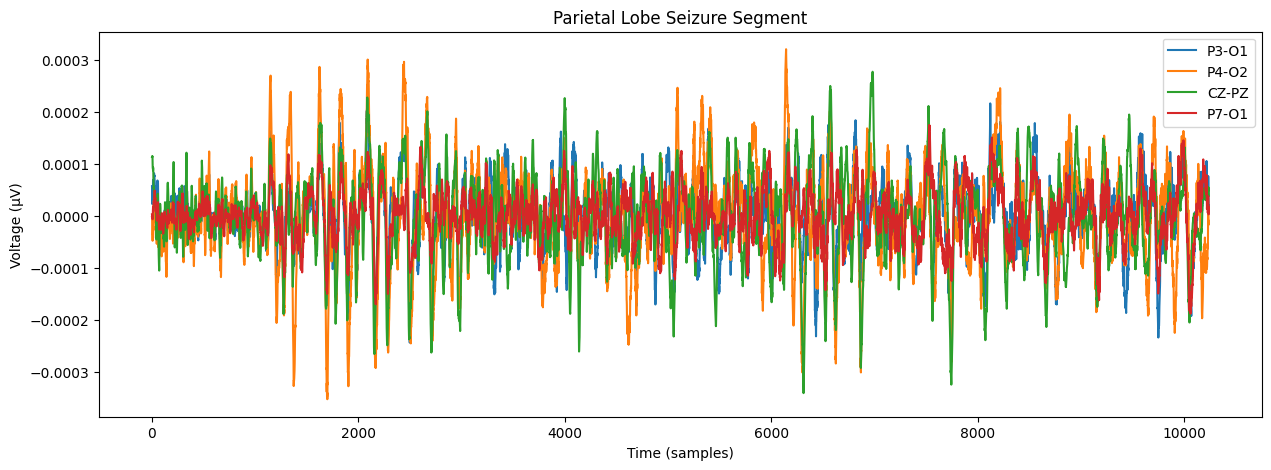

In [ ]:
import matplotlib.pyplot as plt

df[['P3-O1', 'P4-O2', 'CZ-PZ', 'P7-O1']].plot(figsize=(15, 5), title='Parietal Lobe Seizure Segment')
plt.xlabel("Time (samples)")
plt.ylabel("Voltage (µV)")
plt.show()

**Based on the visualizations we can derive the following insights for Parietal Lobe**
* Activity is more moderate in amplitude, with consistent waveform patterns across channels like P3-O1 and CZ-PZ.
* Suggests this region is likely a propagation path, not the origin of the seizure.
* May correlate with temporary sensory issues like numbness or visual distortions, depending on propagation intensity.

**Midline & Deep Region Visualization**

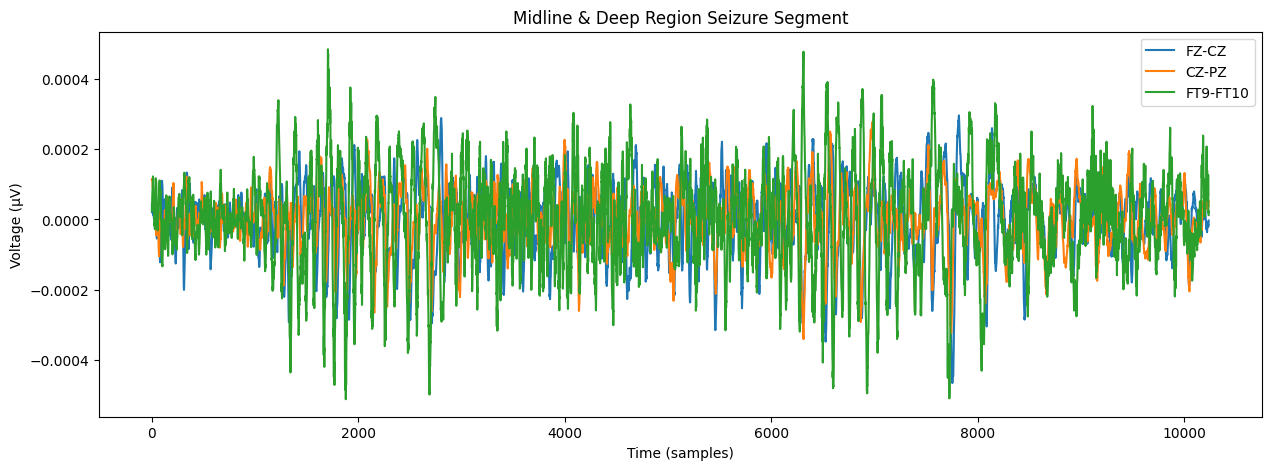

In [ ]:
import matplotlib.pyplot as plt

df[['FZ-CZ','CZ-PZ','FT9-FT10']].plot(figsize=(15, 5), title='Midline & Deep Region Seizure Segment')
plt.xlabel("Time (samples)")
plt.ylabel("Voltage (µV)")
plt.show()


**Based on the visualizations we can derive the following insights for Occipital Lobe**
* Signal strength is relatively lower and more uniform, with subtle rhythmic activity in CZ-PZ and FT9-FT10.
* May represent diffuse spread of seizure rather than focal initiation, acting as a reference/baseline for comparison.
* Useful for identifying background vs seizure signal contrast, especially in central motor and coordination zones.